# Make efficiency map plots for trained fitters

In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import matplotlib.pyplot as plt
#plt.style.use('seaborn-ticks')
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook

import numpy as np

from pprint import pprint

# import xgboost

Welcome to ROOTaaS 6.06/08


load the fitter:

In [2]:
path,name = "./classifiers", "effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out"
fitter = tn.IO.load(name,path,nodata=True)

./classifiers
./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.pkl.gz
loading pickle ./classifiers/effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out.pkl.gz


In [4]:
def plot_efficiency_map(fitter,feedClass=True):
    """
    This function is still in the developpment phase
    So far it is used to produce efficiency plots of Pt vs |y|
    : params 
            fitter : train.EffFitter - the trained classifier
         feedClass : boolean - has influence only on recoPtGrid which is never used
    """
    
    #generate 300 pt bins from 0-300 and 300 pseudo-rap bins from 0-3
    class_grid,class_eff_map = fitter.effMap('class',[(300,0,300),(300,0,3.)])
    
    
    recoPtGrid =  np.hstack([class_grid,class_eff_map]) if feedClass else class_grid
    recoPt_grid,recoPt_eff_map = fitter.effMap('recoPt',recoPtGrid)

    
    print(np.shape(recoPt_grid))
    print(np.shape(recoPt_eff_map))
    
    
        plotting.efficiency_map(class_grid[:,1],class_grid[:,0],class_eff_map,figsize=(21,14),xlabel=r"$|y|$",ylabel=r"$p_T$",
                            layout=(3,None))
        plt.subplots_adjust(hspace = 0.25, wspace = 0.3, top=0.88)

    plotting.efficiency_map(recoPt_grid[:,1],recoPt_grid[:,0],recoPt_eff_map,figsize=(21,56),xlabel=r"$|y|$",ylabel=r"$p_T$",
                        layout=(3,None))
    plt.subplots_adjust(hspace = 0.25, wspace = 0.1, top=0.93)
    
    


    #resummed = np.array(map(lambda y: recoPt_eff_map[:,y].sum(), map(lambda x: range(x+1,22,3), range(3)) )).transpose()
    #classwise = class_eff_map[:,1:].sum(axis=0)

    #print(resummed / classwise)
    #print(resummed.sum() / classwise.sum())
    


class
['genPt', 'absGenRapidity']
type grid is list
(90000, 2)
(90000, 4)
recoPt
['genPt', 'absGenRapidity', 'class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3']
(90000, 6)
(90000, 25)
(90000, 6)
(90000, 25)


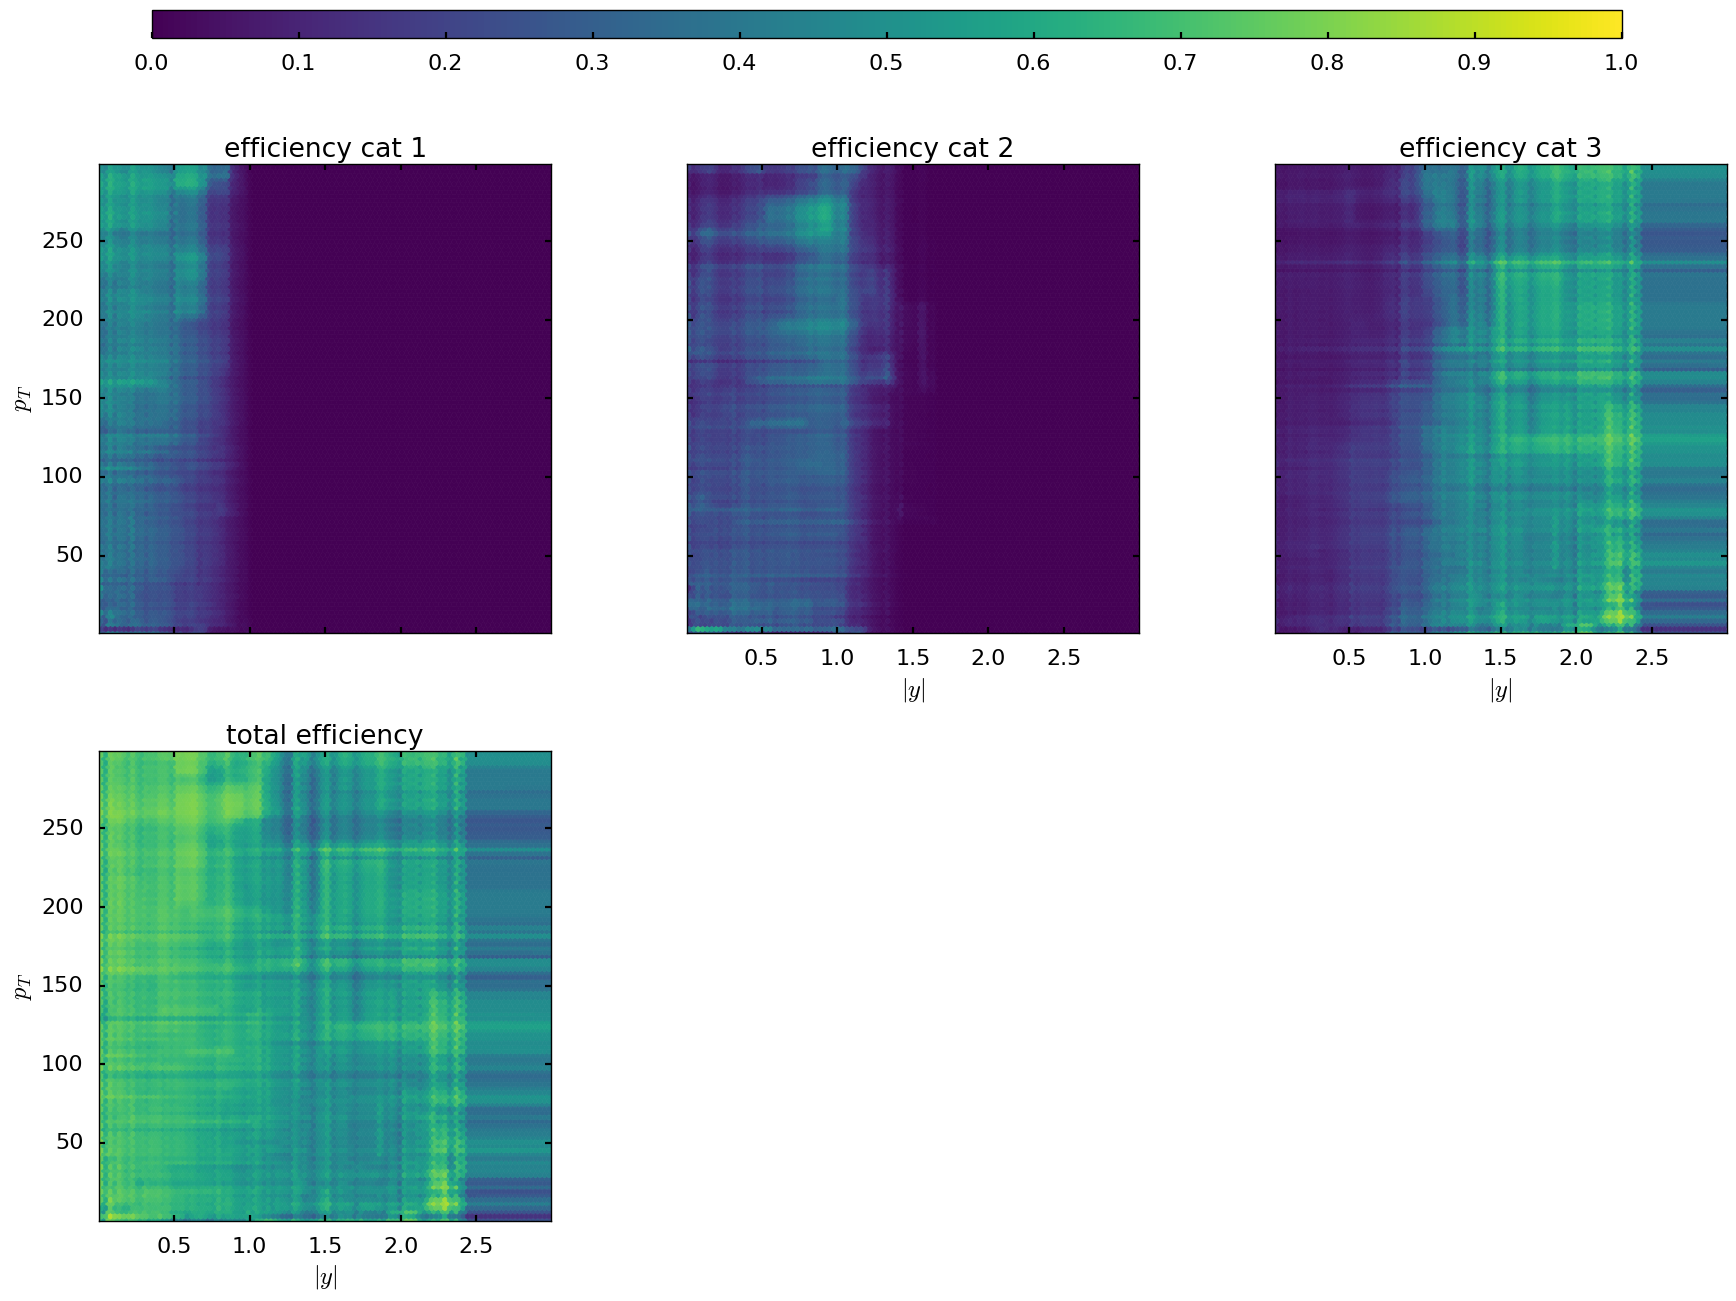

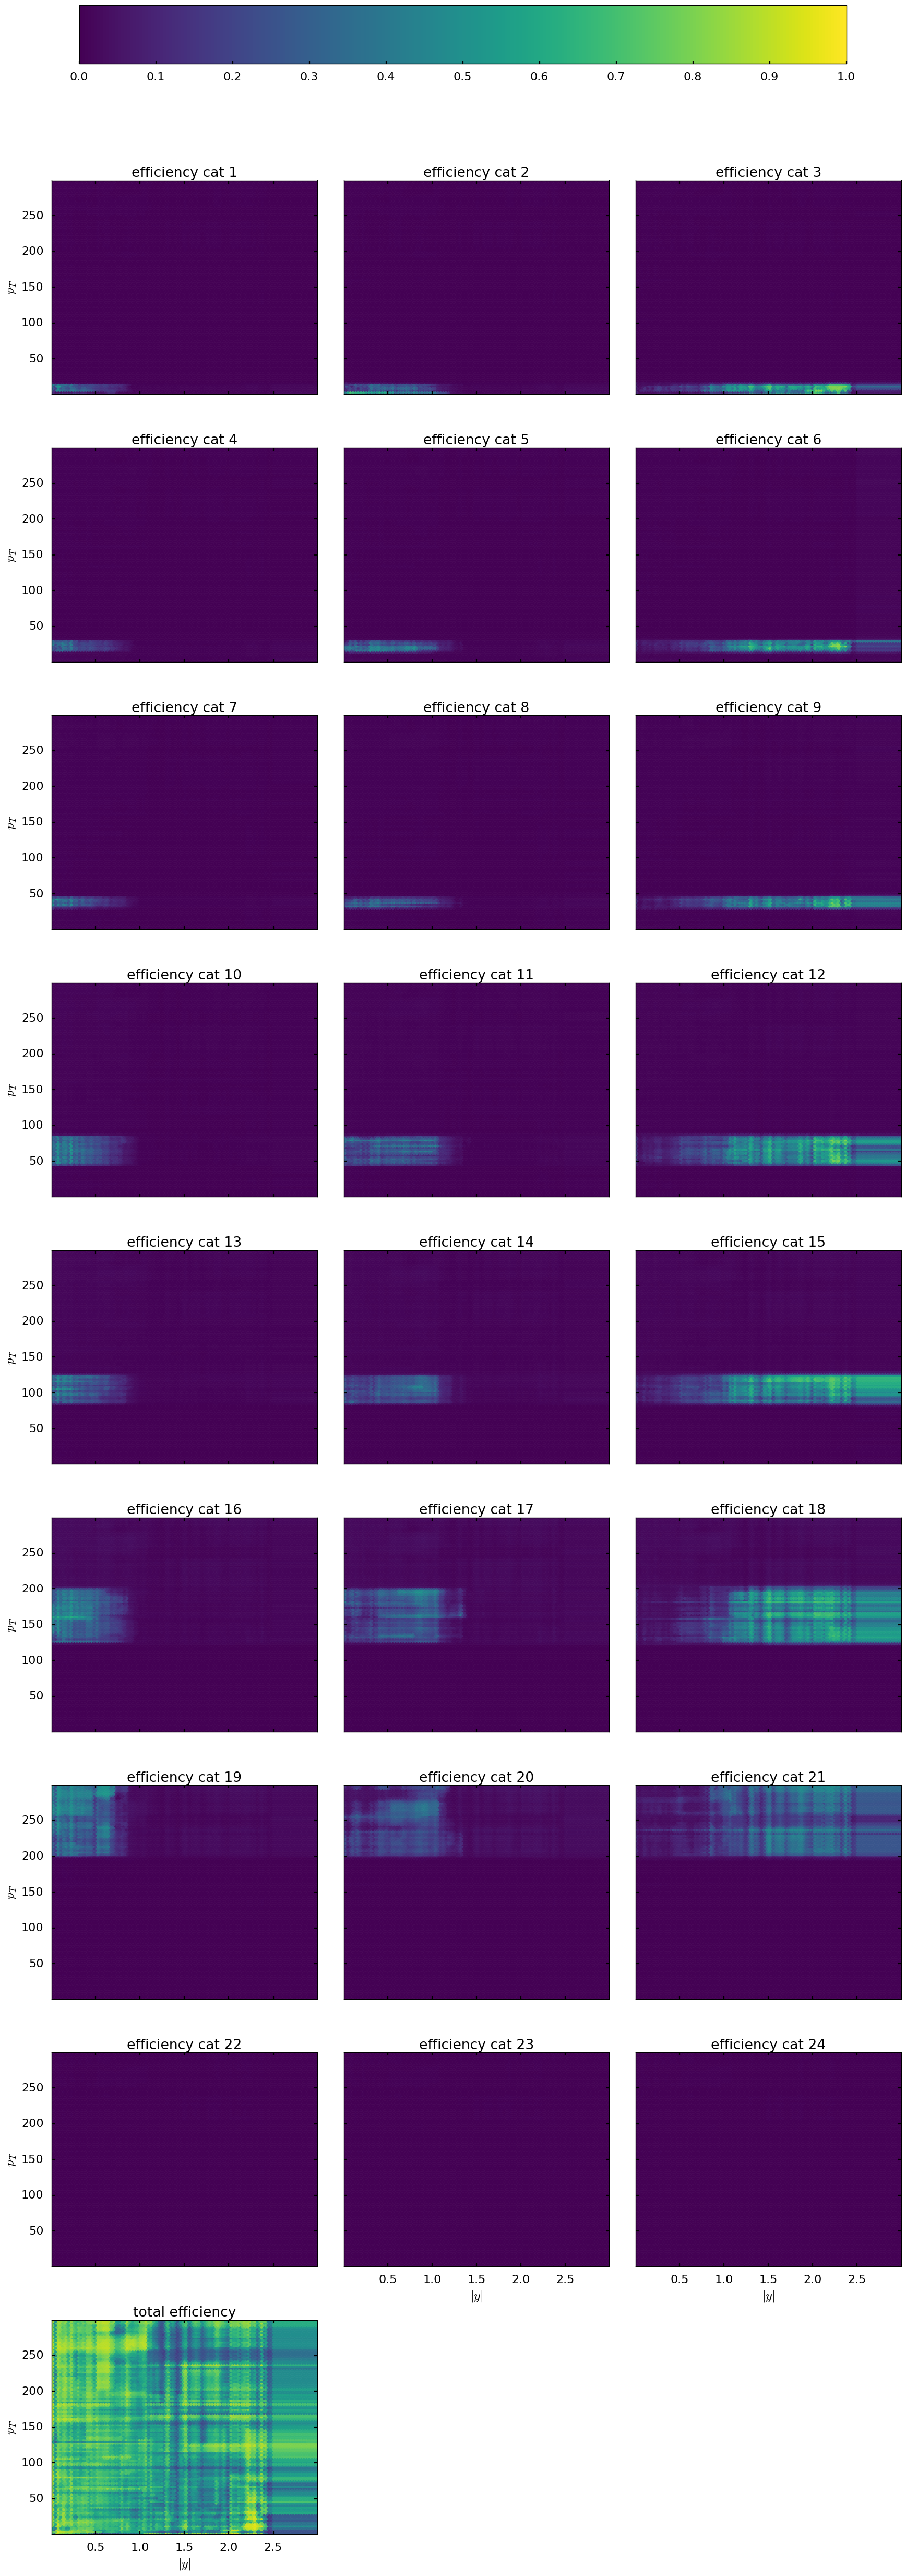

In [5]:
plot_efficiency_map(fitter)

### What are the variables class_grid and class_eff_map ?

first we bin the variables we are interested in. In this case $p_T$ and $|y|$.

$$ 
    \begin{equation}
        \begin{aligned}
            p_T &\in [0,300] \text{ with 300 bins} \\
            |y| &\in [0,3] \text{ with 300 bins}
        \end{aligned}
    \end{equation}
$$

Thus, there are $300 \times 300 = 90000$ bins on a $p_t$-$|y|$ grid. This grid is saved in the variable <font color='red'>class_grid</font> in form of a $90000 \times 2$ matrix:

$$
    \begin{pmatrix}
        p_T = 0.5 & |y| = 0.005 \\
        p_T = 0.5 & |y| = 0.010 \\
        \vdots & \vdots \\
        p_T = 0.5 & |y| = 0.295 \\
        p_T = 1.0 & |y| = 0.005 \\
        p_T = 1.0 & |y| = 0.010 \\
        \vdots & \vdots   
    \end{pmatrix}
$$

The variable <font color='red'>class_eff_map</font> is a $90000 \times 4$ matrix storing the probability/efficiency of each category 0,1,2,3 in the correspnding $p_T$-$|y|$ bin.


# work still in progress from here on

In [ ]:
plot_efficiency_map(fitter,False)

In [ ]:
%%bash

ls jobs

In [ ]:
# path,name = "jobs/Train_Configurable_binned_3495","Train_Configurable_binned_3495"

path,name = "jobs/Train_Configurable_binned_16569","Train_Configurable_binned_16569"
fitter = tn.IO.load(name,path,nodata=True)

In [ ]:
plot_efficiency_map(fitter,False)